# ***`Smoking Consumption Habit Modeling with LIWC`***
---
#### 1. **Dataset Preparation:**
#### 2. **EDA & Feature Selection**
#### 3. **Target Drugs**
---

## Base Libraries
---

In [1]:
import pandas as pd

# enable to see all columns:
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

import shap

from typing import List, Any
from sklearn.base import BaseEstimator
from sklearn.metrics import precision_score, recall_score, f1_score

# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Helper Functions
---

In [2]:
from helper_functions import *

The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.


## **1) Data Set Preparation**
---

### 1.1) Read Data:

In [3]:
df = pd.read_parquet("merged_data/df_cascade_consumption_liwc.parquet")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Missing values: {df.isnull().sum().sum()}")
print()
display_data_shape(df)
df.head()

Duplicates: 0
Missing values: 0

Data dimensions:
---------------------------------------------------------------------
 - Number of observations: 1,185
 - Number of columns: 97


,userid,smoking_status,alcohol_status,drug_status,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,ba4d96426226699b8c511ce0bee75941,True,True,True,7197,43.31,59.44,60.57,44.88,19.94,11.39,82.03,45.07,15.92,11.45,6.27,0.42,3.49,0.51,0.76,4.47,4.15,9.11,7.95,4.71,5.46,2.08,17.13,4.59,1.70,1.56,2.15,1.76,7.54,4.28,3.24,0.24,1.29,0.58,11.17,1.36,0.53,1.29,0.83,10.56,2.32,1.13,1.90,2.24,1.35,3.36,3.06,1.14,0.60,1.08,3.97,1.28,1.18,0.50,0.71,7.25,2.47,0.82,2.18,1.93,0.43,2.90,12.95,1.74,13.07,2.14,5.66,5.29,0.76,1.46,0.79,0.76,0.40,0.21,7.35,0.97,5.54,0.25,0.42,0.04,31.15,2.96,1.65,0.79,0.07,2.88,17.02,0.40,0.69,2.50,0.49,1.70
1,1a388284961e77942bae7a0ead109eea,False,True,False,4025,35.20,73.85,50.29,70.64,8.67,10.71,81.66,46.26,18.76,14.16,7.08,0.77,5.47,0.40,0.45,4.60,4.05,8.99,8.52,4.57,5.44,1.57,17.89,5.19,1.79,1.49,4.89,1.27,9.69,5.96,3.58,0.37,1.57,0.50,12.50,0.42,0.75,0.65,0.72,10.01,1.91,1.61,2.09,2.19,1.69,2.11,3.38,1.49,0.92,0.62,4.47,1.86,0.70,0.55,0.87,7.18,2.78,0.75,2.01,1.96,0.37,2.53,12.45,2.21,12.42,1.91,5.84,4.89,0.77,1.59,0.17,0.22,0.30,0.47,4.37,1.59,2.36,0.25,0.25,0.00,38.63,13.59,5.86,2.46,0.32,1.74,1.74,1.09,1.81,4.45,1.59,3.98
2,ec539b2398f80d1f395ba4cc06c230a7,False,False,False,2741,51.55,71.78,53.26,90.03,13.77,14.19,86.25,51.77,14.52,10.69,4.85,1.31,2.59,1.61,0.33,3.83,5.25,12.29,10.40,5.18,5.87,1.53,19.41,4.38,0.95,1.64,1.35,1.50,7.88,5.87,2.01,0.04,0.36,0.84,10.65,0.47,0.40,1.39,0.80,8.79,1.64,0.73,1.64,2.19,1.64,2.26,2.48,1.28,0.40,0.66,2.59,0.58,0.95,0.00,0.51,7.66,3.06,0.91,1.68,1.97,0.29,5.18,12.81,3.47,15.98,2.59,6.09,7.59,1.42,1.79,1.39,0.26,1.17,0.11,2.23,0.15,1.06,0.36,0.51,0.00,20.32,7.00,4.52,0.95,0.11,0.33,3.83,0.47,0.44,2.19,0.26,0.22
3,0e0b122ce777606ae73dd055d76fc1c7,False,False,False,5,8.19,50.00,1.00,1.00,1.67,20.00,80.00,40.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,120.00,40.00,0.00,0.00,0.00,20.00,60.00,0.00,0.00,0.00,0.00,0.00
4,58bcb86a962fc98d2feb5e3562ac45c0,True,True,False,1548,48.77,42.07,79.91,77.98,8.70,12.21,86.95,48.45,15.44,10.01,7.69,0.65,1.03,0.32,0.32,5.43,5.56,10.53,9.63,5.81,4.65,1.49,18.22,5.17,1.61,1.36,3.68,2.00,6.91,4.84,2.00,0.19,0.45,0.26,7.69,0.90,0.26,0.32,0.84,9.04,1.42,0.97,2.20,2.13,1.36,2.07,2.78,1.10,0.71,0.58,3.49,0.90,0.97,0.00,1.49,6.65,2.26,1.61,1.68,1.87,0.26,3.49,13.44,2.91,17.38,3.04,5.17,9.69,2.26,3.04,0.26,0.58,0.45,0.06,2.97,0.13,1.74,0.71,0.52,0.06,45.09,18.54,1.68,0.19,0.06,1.61,12.14,1.49,1.16,4.13,1.49,2.58


### 1.2) Filter Based on word count (WC)?

Minimum word count: 1


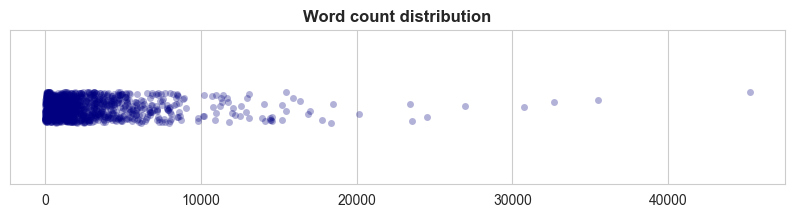

In [4]:
plt.figure(figsize=(10, 2))
plt.title('Word count distribution', weight='bold')
sns.stripplot(
        x='WC', data=df,
        jitter=True, alpha=.3,
        color='navy'
)
plt.xlabel("")
print(f"Minimum word count: {df['WC'].min()}")

- Instances with word count <= 50?

In [5]:
df.query("WC <= 50").shape[0]

45

In [5]:
#threshold = int(input("Enter the minimum word count: ")) # 50
df = df.query('WC >= 50')
display_data_shape(df)

Data dimensions:
---------------------------------------------------------------------
 - Number of observations: 1,140
 - Number of columns: 97


### 1.3) Train-Test-Split
- define feature and predictor sets:

In [6]:
consumption = [c for c in df.columns if c.endswith('status')]
liwc        = [
        c for c in df.columns
            if c not in consumption
            and c != 'userid'
    ]

print(f"# features in liwc: {len(liwc)}")
print(f"Targets: {consumption}")

# features in liwc: 93
Targets: ['smoking_status', 'alcohol_status', 'drug_status']


- train-test-split():

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[liwc]
y = df['smoking_status'].astype(int)


'Smoking'
X_train, X_test, \
    y_train, y_test = train_test_split(
                                X, y, test_size=0.2, stratify=y, random_state=42
    )

In [10]:
plot_target_ratios(
    df      = pd.concat([X, y], axis=1),
    targets = ['smoking_status'],
)

- Weight definition for manjority class:

In [11]:
# select label frequencies
class_0, class_1 = y_train.value_counts()[0], y_train.value_counts()[1]

# compute class weights for each target:
# -> formula = n negative samples / n positive samples
minority_weight = round(class_0 / class_1, 2)

# display as dataframe
pd.DataFrame(
        data    = [minority_weight],
        index   = ['smoking_status'],
        columns = ['class_weight']
)

,class_weight
smoking_status,2.97


## **2) EDA & Feature Selection**
---

### 2.1) Distribution Analysis:

- Wit respect to targets:

In [12]:
#plot_continuous_features_target(
#    df       = pd.concat([X_train_drug, y_train_drug], axis=1),
#    features = liwc,
#    target   = 'drug_status',
#    title    = 'drug Status',
#)

### 2.2) Non-Normal: Mann-Whitney U

- Without p-value adjustment:

In [9]:
print(f"Test α < 0.05\n{39*'~'}")
f_005_df = mannwhitney(
    data     = pd.concat([X_train, y_train], axis=1),
    features = liwc,
    target   = 'smoking_status',
    alpha    = 0.05
)

features_005 = f_005_df['feature'].tolist()
print(features_005)

Test α < 0.05
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
26 out of 93 features are significant with respect to smoking_status based on raw p-values:
['bio', 'swear', 'work', 'sexual', 'number', 'see', 'percept', 'Colon', 'focuspast', 'assent', 'time', 'adverb', 'health', 'nonflu', 'leisure', 'Sixltr', 'social', 'hear', 'body', 'anx', 'you', 'adj', 'anger', 'informal', 'cause', 'home']


- With p-value adjustment ( Benjamini Hochberg Correction ):

In [9]:
print(f"Test α < 0.05\n{39*'~'}")
f_005_df = smoking_features_df = mannwhitney_adjusted(
    data     = pd.concat([X_train, y_train], axis=1),
    features = liwc,
    target   = 'smoking_status',
    alpha    = 0.05
)

features_005_adj = f_005_df['feature'].tolist()
print(features_005_adj)


Test α < 0.05
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
16 out of 93 features are significant with respect to smoking_status after p-value adjustment:
['work', 'swear', 'bio', 'sexual', 'number', 'see', 'percept', 'Colon', 'focuspast', 'assent', 'time', 'adverb', 'health', 'nonflu', 'leisure', 'Sixltr']


## **3) Target Modeling: Drugs**
---
### **3.0) Dummy Classifier as Baseline**

In [11]:
# dummy classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score


dummy = DummyClassifier(strategy='stratified', random_state=42)

dummy.fit(X_train, y_train)

classification_reports(
    model  = dummy,
    X_train= X_train,
    y_train= y_train,
    X_test = X_test,
    y_test = y_test
)

Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.748905,0.752199,0.750549,682.000000
1,0.255507,0.252174,0.253829,230.000000
accuracy,0.626096,0.626096,0.626096,0.626096
macro avg,0.502206,0.502187,0.502189,912.000000
weighted avg,0.624473,0.626096,0.625280,912.000000



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.741379,0.758824,0.750000,170.000000
1,0.240741,0.224138,0.232143,58.000000
accuracy,0.622807,0.622807,0.622807,0.622807
macro avg,0.491060,0.491481,0.491071,228.000000
weighted avg,0.614024,0.622807,0.618264,228.000000


### **3.0) Weighted Minority Class**
#### 3.1.1) `LogReg`

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, balanced_accuracy_score

- Optimize:

In [17]:
# create pipeline
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l1', solver='liblinear', max_iter=100_000, class_weight={0:1, 1:minority_weight})) #1_000
])

# create parameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

# Create a balanced accuracy scorer
balanced_acc_scorer = make_scorer(balanced_accuracy_score)

# Define a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create GridSearchCV object
logreg_cv = GridSearchCV(
                    estimator  = logreg_pipe,
                    param_grid = param_grid,
                    scoring    = balanced_acc_scorer,
                    cv         = stratified_kfold,
                    n_jobs     = -1,
                    verbose    = 1
)

# fit
logreg_cv.fit(X_train_drug, y_train_drug)

# Best model, parameters, and scores
print("Best Parameters:", logreg_cv.best_params_)
print("Best Cross-Validation Score:", logreg_cv.best_score_)

NameError: name 'X_train_drug' is not defined

- Evaluate:

In [ ]:
# refit
best_logreg = logreg_cv.best_estimator_

best_logreg.fit(X_train_drug, y_train_drug)

classification_reports(
    model   = best_logreg,
    X_train = X_train_drug,
    y_train = y_train_drug,
    X_test  = X_test_drug,
    y_test  = y_test_drug
)

Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.897927,0.759784,0.823099,741.000000
1,0.375439,0.625731,0.469298,171.000000
accuracy,0.734649,0.734649,0.734649,0.734649
macro avg,0.636683,0.692758,0.646199,912.000000
weighted avg,0.799960,0.734649,0.756762,912.000000



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.850000,0.735135,0.788406,185.000000
1,0.279412,0.441860,0.342342,43.000000
accuracy,0.679825,0.679825,0.679825,0.679825
macro avg,0.564706,0.588498,0.565374,228.000000
weighted avg,0.742389,0.679825,0.704280,228.000000


#### 3.1.2) `XGBoost`

In [13]:
from xgboost import XGBClassifier
import optuna

- Optimize:

In [ ]:
def objective(trial):
    # Hyperparameter suggestions
    n_estimators     = trial.suggest_int("n_estimators", 39, 233)
    max_depth        = trial.suggest_int("max_depth", 2, 4)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 9)
    subsample        = trial.suggest_loguniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_loguniform('colsample_bytree', 0.6, 1.0)
    learning_rate    = trial.suggest_loguniform('learning_rate', 0.0001, 0.3)
    reg_alpha        = trial.suggest_loguniform('reg_alpha', 0.5, 3.0)

    # XGBoost model
    model = XGBClassifier(
                    n_estimators     = n_estimators,
                    max_depth        = max_depth,
                    min_child_weight = min_child_weight,
                    subsample        = subsample,
                    colsample_bytree = colsample_bytree,
                    learning_rate    = learning_rate,
                    reg_alpha        = reg_alpha,
                    scale_pos_weight = minority_weight,
                    eval_metric      = 'logloss',
                    use_label_encoder= False,
                    n_jobs           = -1
    )

    # Balanced accuracy scorer for cross-validation
    bal_acc_scorer = make_scorer(balanced_accuracy_score)

    # initialize StratifiedKFold
    stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Cross-validation with F1 score
    score = cross_val_score(
                        estimator = model,
                        X         = X_train_drug[features_005],
                        y         = y_train_drug,
                        n_jobs    = -1,
                        cv        = stratified_cv,
                        scoring   = bal_acc_scorer
    ).mean()

    return score

# Create Study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=33, timeout=4000)

print(99*'_')
print('Best trial:', study.best_trial.params)

[I 2024-01-19 12:19:35,523] A new study created in memory with name: no-name-d5c5fd5d-f197-43f8-a053-899afa3ef29e


[I 2024-01-19 12:19:35,862] Trial 0 finished with value: 0.6714667019961138 and parameters: {'n_estimators': 149, 'max_depth': 2, 'min_child_weight': 5, 'subsample': 0.4476203715212608, 'colsample_bytree': 0.9772266310591537, 'learning_rate': 0.00042247983801937966, 'reg_alpha': 1.0367683400996903}. Best is trial 0 with value: 0.6714667019961138.
[I 2024-01-19 12:19:36,431] Trial 1 finished with value: 0.7007141847730083 and parameters: {'n_estimators': 116, 'max_depth': 4, 'min_child_weight': 7, 'subsample': 0.7386905730284307, 'colsample_bytree': 0.7762990751880636, 'learning_rate': 0.0050022808138410705, 'reg_alpha': 0.5363357776265496}. Best is trial 1 with value: 0.7007141847730083.
[I 2024-01-19 12:19:36,863] Trial 2 finished with value: 0.6919122063239711 and parameters: {'n_estimators': 112, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.10549559228787458, 'colsample_bytree': 0.9858837861603024, 'learning_rate': 0.00017403718035767198, 'reg_alpha': 1.7365861889083092}. B

___________________________________________________________________________________________________
Best trial: {'n_estimators': 219, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.9985680125695215, 'colsample_bytree': 0.9034510310515157, 'learning_rate': 0.021698960844562284, 'reg_alpha': 0.9436126105386969}


- Refit & evaluate:

In [ ]:
best_params = study.best_trial.params

# XGBoost model
xgb_weighted_mwu_005 = XGBClassifier(
                    n_estimators     = best_params['n_estimators'],
                    max_depth        = best_params['max_depth'],
                    min_child_weight = best_params['min_child_weight'],
                    subsample        = best_params['subsample'],
                    colsample_bytree = best_params['colsample_bytree'],
                    learning_rate    = best_params['learning_rate'],
                    reg_alpha        = best_params['reg_alpha'],
                    scale_pos_weight = minority_weight,
                    eval_metric      = 'logloss',
                    use_label_encoder= False,
                    n_jobs           = -1
)

xgb_weighted_mwu_005.fit(X_train_drug[features_005], y_train_drug)

classification_reports(
    model = xgb_weighted_mwu_005,
    X_train=X_train_drug[features_005],
    y_train=y_train_drug,
    X_test = X_test_drug[features_005],
    y_test = y_test_drug
)

Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.977273,0.870445,0.920771,741.000000
1,0.619048,0.912281,0.737589,171.000000
accuracy,0.878289,0.878289,0.878289,0.878289
macro avg,0.798160,0.891363,0.829180,912.000000
weighted avg,0.910106,0.878289,0.886424,912.000000



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.860606,0.767568,0.811429,185.000000
1,0.317460,0.465116,0.377358,43.000000
accuracy,0.710526,0.710526,0.710526,0.710526
macro avg,0.589033,0.616342,0.594394,228.000000
weighted avg,0.758171,0.710526,0.729564,228.000000


#### 3.1.3) `LightGBM`

In [ ]:
from lightgbm import LGBMClassifier

- Optimize:

In [ ]:
def objective(trial):

    # LightGBM model
    model = LGBMClassifier(
                    num_leaves        = trial.suggest_int("num_leaves", 3, 30),
                    max_depth         = trial.suggest_int("max_depth", 2, 3),
                    learning_rate     = trial.suggest_loguniform("learning_rate", 0.0001, 0.01),
                    n_estimators      = trial.suggest_int("n_estimators", 100, 300),
                    min_child_samples = trial.suggest_int("min_child_samples", 100, 200),
                    subsample         = trial.suggest_uniform("subsample", 0.1, 0.5),
                    colsample_bytree  = trial.suggest_uniform("colsample_bytree", 0.1, 0.5),
                    reg_alpha         = trial.suggest_loguniform("reg_alpha", 1e-8, 10.0),
                    reg_lambda        = trial.suggest_loguniform("reg_lambda", 1e-8, 10.0),
                    objective         = 'binary',
                    metric            = 'binary_logloss',
                    scale_pos_weight  = minority_weight,
                    boosting_type     = 'gbdt',
                    force_col_wise    = True,
                    verbose           = -1,
                    random_state      = 42
                )

    # Balanced accuracy scorer for cross-validation
    bal_acc_scorer = make_scorer(balanced_accuracy_score)

    # Initialize StratifiedKFold
    stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Cross-validation with balanced accuracy score
    score = cross_val_score(
                        estimator = model,
                        X         = X_train_drug[features_005],
                        y         = y_train_drug,
                        n_jobs    = -1,
                        cv        = stratified_cv,
                        scoring   = bal_acc_scorer
    ).mean()

    return score

# Create Study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=33, timeout=4000)

print(99*'_')
print('Best trial:', study.best_trial.params)

[I 2024-01-19 11:13:57,760] A new study created in memory with name: no-name-b1a9680b-6fb6-48c4-b20e-03e44f0e8b9c


[I 2024-01-19 11:13:58,705] Trial 0 finished with value: 0.6760628864158276 and parameters: {'num_leaves': 10, 'max_depth': 3, 'learning_rate': 0.006513803890544954, 'n_estimators': 278, 'min_child_samples': 175, 'subsample': 0.31399800763204905, 'colsample_bytree': 0.3357212368291993, 'reg_alpha': 1.3626892147330309e-08, 'reg_lambda': 1.1203678049509893e-05}. Best is trial 0 with value: 0.6760628864158276.
[I 2024-01-19 11:13:58,978] Trial 1 finished with value: 0.5 and parameters: {'num_leaves': 19, 'max_depth': 2, 'learning_rate': 0.0009142254692537372, 'n_estimators': 136, 'min_child_samples': 154, 'subsample': 0.3164430205237001, 'colsample_bytree': 0.46827896780361256, 'reg_alpha': 1.5435035963319312, 'reg_lambda': 1.7624994178868316e-06}. Best is trial 0 with value: 0.6760628864158276.
[I 2024-01-19 11:13:59,410] Trial 2 finished with value: 0.6698579756226816 and parameters: {'num_leaves': 16, 'max_depth': 3, 'learning_rate': 0.006439236927439888, 'n_estimators': 233, 'min_chil

___________________________________________________________________________________________________
Best trial: {'num_leaves': 10, 'max_depth': 3, 'learning_rate': 0.009801866308508642, 'n_estimators': 234, 'min_child_samples': 105, 'subsample': 0.21192473061548733, 'colsample_bytree': 0.32688680573002354, 'reg_alpha': 4.714947886596101e-07, 'reg_lambda': 6.388897960965078e-07}


- Refit & evaluate:

In [ ]:
best_params = study.best_trial.params

lgbm_mwu_005 = LGBMClassifier(
                    num_leaves        = best_params["num_leaves"],
                    max_depth         = best_params["max_depth"],
                    learning_rate     = best_params["learning_rate"],
                    n_estimators      = best_params["n_estimators"],
                    min_child_samples = best_params["min_child_samples"],
                    subsample         = best_params["subsample"],
                    colsample_bytree  = best_params["colsample_bytree"],
                    reg_alpha         = best_params["reg_alpha"],
                    reg_lambda        = best_params["reg_lambda"],
                    objective         = 'binary',
                    metric            = 'binary_logloss',
                    scale_pos_weight  = minority_weight,
                    boosting_type     = 'gbdt',
                    force_col_wise    = True,
                    verbose           = -1,
                    random_state      = 42
                )

lgbm_mwu_005.fit(X_train_drug[features_005], y_train_drug)

classification_reports(
    model = lgbm_mwu_005,
    X_train=X_train_drug[features_005],
    y_train=y_train_drug,
    X_test = X_test_drug[features_005],
    y_test = y_test_drug
)

Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.922853,0.855601,0.887955,741.000000
1,0.524444,0.690058,0.595960,171.000000
accuracy,0.824561,0.824561,0.824561,0.824561
macro avg,0.723649,0.772830,0.741957,912.000000
weighted avg,0.848151,0.824561,0.833206,912.000000



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.851190,0.772973,0.810198,185.000000
1,0.300000,0.418605,0.349515,43.000000
accuracy,0.706140,0.706140,0.706140,0.706140
macro avg,0.575595,0.595789,0.579856,228.000000
weighted avg,0.747238,0.706140,0.723315,228.000000


### **3.2) Under- & Oversampling**
- https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7

In [10]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours, NeighbourhoodCleaningRule
from imblearn.over_sampling import SMOTE, SVMSMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, balanced_accuracy_score, f1_score, precision_score, recall_score, accuracy_score

- LogReg:
  - Best params: {'estimator__C': 0.1, 'oversampler__n_neighbors': 4}
  - Best params: {'estimator__C': 10, 'oversampler__n_neighbors': 4}

In [16]:
to_be_tuned = {
        'oversampler__n_neighbors': [2,3,4,5],
        'estimator__C': [0.1, 0.3, 1, 10],
}

pipe = ImbPipeline([
        ('noiseremoer',  TomekLinks(sampling_strategy='auto', n_jobs=-1)),
        ('undersampler', RandomUnderSampler(sampling_strategy={0:500}, random_state=42)), # 0:500
        ('scaler',       StandardScaler()),
        ('oversampler',  ADASYN(sampling_strategy='auto', random_state=42)),
        ('estimator',    LogisticRegression(random_state=42, penalty='l1', solver='liblinear'))
])

tuner = GridSearchCV(
        estimator  = pipe,
        param_grid = to_be_tuned,
        scoring    = make_scorer(recall_score, average='macro'),
        n_jobs     = -1,
        cv         = StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        verbose    = 1,
        refit       = True
)

tuner.fit(
        X_train[features_005],
        y_train
)

print(f"Best score: {tuner.best_score_}")

print(f"Best params: {tuner.best_params_}")

logreg_005 = tuner.best_estimator_

# Evaluation:
classification_reports(
    model   = logreg_005,
    X_train = X_train[features_005],
    y_train = y_train,
    X_test  = X_test[features_005],
    y_test  = y_test
)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


Best score: 0.6608908780903665
Best params: {'estimator__C': 10, 'oversampler__n_neighbors': 4}
Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.875000,0.626100,0.729915,682.000000
1,0.398585,0.734783,0.516820,230.000000
accuracy,0.653509,0.653509,0.653509,0.653509
macro avg,0.636792,0.680441,0.623367,912.000000
weighted avg,0.754851,0.653509,0.676173,912.000000



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.860465,0.652941,0.742475,170.000000
1,0.404040,0.689655,0.509554,58.000000
accuracy,0.662281,0.662281,0.662281,0.662281
macro avg,0.632253,0.671298,0.626015,228.000000
weighted avg,0.744357,0.662281,0.683223,228.000000


- RF & TomekLink:
  - Best params: {'estimator__criterion': 'gini', 'estimator__max_depth': 3, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 6, 'estimator__min_samples_split': 4, 'oversampler__n_neighbors': 6}
  - `Best params:` {'estimator__criterion': 'gini', 'estimator__max_depth': 2, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 6, 'estimator__min_samples_split': 9, 'oversampler__n_neighbors': 7}
    - `optimal fit!`




In [16]:
sampler = pipe = ImbPipeline([
        ('noiseremover', TomekLinks(sampling_strategy='majority')),
        ('undersampler', RandomUnderSampler(sampling_strategy={0:500}, random_state=42)),
        ('scaler',       StandardScaler()),
        ('oversampler',  ADASYN(sampling_strategy='auto', random_state=42)),
])

X_train_resampled, y_train_resampled = sampler.fit_resample(
        X_train[features_005],
        y_train
)

y_train_resampled.value_counts()

smoking_status
0    500
1    495
Name: count, dtype: int64

In [22]:
# import random forest
from sklearn.ensemble import RandomForestClassifier

to_be_tuned = {
        'oversampler__n_neighbors':            [5,6,7],
        'estimator__max_depth':                [2], # 3
        'estimator__min_samples_split':        [9], # min number of samples required to split an internal node
        'estimator__min_samples_leaf':         [5,6,7],  # min number of samples required to be at a leaf node
        'estimator__max_features':             ['sqrt'],
        'estimator__criterion':                ['gini', 'entropy']
}

pipe = ImbPipeline([
        ('noiseremover', TomekLinks(sampling_strategy='majority')),
        ('undersampler', RandomUnderSampler(sampling_strategy={0:539}, random_state=42)),
        ('scaler',       StandardScaler()),
        ('oversampler',  ADASYN(sampling_strategy='auto', random_state=42)),
        ('estimator',    RandomForestClassifier(random_state=42))
])

tuner = GridSearchCV(
        estimator  = pipe,
        param_grid = to_be_tuned,
        scoring    = make_scorer(recall_score, average='macro'),
        n_jobs     = -1,
        cv         = StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        verbose    =  1,
)

tuner.fit(
        X_train[features_005],
        y_train
)

print(f"Best score: {tuner.best_score_}")
print(f"Best params: {tuner.best_params_}")

rf_005 = tuner.best_estimator_

# Evaluation:
classification_reports(
    model   = rf_005,
    X_train = X_train[features_005],
    y_train = y_train,
    X_test  = X_test[features_005],
    y_test  = y_test
)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.6268435635123615
Best params: {'estimator__criterion': 'gini', 'estimator__max_depth': 2, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 6, 'estimator__min_samples_split': 9, 'oversampler__n_neighbors': 7}
Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.854244,0.678886,0.756536,682.000000
1,0.408108,0.656522,0.503333,230.000000
accuracy,0.673246,0.673246,0.673246,0.673246
macro avg,0.631176,0.667704,0.629935,912.000000
weighted avg,0.741731,0.673246,0.692680,912.000000



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.854167,0.723529,0.783439,170.000000
1,0.440476,0.637931,0.521127,58.000000
accuracy,0.701754,0.701754,0.701754,0.701754
macro avg,0.647321,0.680730,0.652283,228.000000
weighted avg,0.748930,0.701754,0.716711,228.000000


- SVM:
  - Best params: {'estimator__C': 0.1, 'estimator__decision_function_shape': 'ovo', 'estimator__degree': 2, 'estimator__gamma': 'auto', 'estimator__kernel': 'sigmoid', 'estimator__shrinking': True, 'oversampler__n_neighbors': 5}



In [11]:
# import svm
from sklearn.svm import SVC

to_be_tuned = {
        'oversampler__n_neighbors':           [2,3,4,5],
        'estimator__C':                       [0.1],
        'estimator__degree':                  [2,3,4,5],
        'estimator__gamma':                   ['scale', 'auto'],
        'estimator__kernel':                  ['poly', 'sigmoid'],
        'estimator__shrinking':               [True, False],
        'estimator__decision_function_shape': ['ovo', 'ovr']
}

pipe = ImbPipeline([
        ('undersampler', RandomUnderSampler(sampling_strategy={0:500}, random_state=42)),
        ('scaler',       StandardScaler()),
        ('oversampler',  ADASYN(sampling_strategy='auto', random_state=42)),
        ('estimator',    SVC(random_state=42, probability=True, kernel='poly'))
])

tuner = GridSearchCV(
        pipe,
        param_grid = to_be_tuned,
        scoring    = make_scorer(recall_score, average='macro'),
        n_jobs     = -1,
        cv         = StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        verbose    = 1
)

tuner.fit(
        X_train[features_005],
        y_train
)

print(f"Best score: {tuner.best_score_}")

print(f"Best params: {tuner.best_params_}")

svc_005 = tuner.best_estimator_

# Evaluation:
classification_reports(
    model   = svc_005,
    X_train = X_train[features_005],
    y_train = y_train,
    X_test  = X_test[features_005],
    y_test  = y_test
)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


Best score: 0.662914200907275
Best params: {'estimator__C': 0.1, 'estimator__decision_function_shape': 'ovo', 'estimator__degree': 2, 'estimator__gamma': 'auto', 'estimator__kernel': 'sigmoid', 'estimator__shrinking': True, 'oversampler__n_neighbors': 5}
Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.865306,0.621701,0.723549,682.000000
1,0.388626,0.713043,0.503067,230.000000
accuracy,0.644737,0.644737,0.644737,0.644737
macro avg,0.626966,0.667372,0.613308,912.000000
weighted avg,0.745091,0.644737,0.667945,912.000000



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.854962,0.658824,0.744186,170.000000
1,0.402062,0.672414,0.503226,58.000000
accuracy,0.662281,0.662281,0.662281,0.662281
macro avg,0.628512,0.665619,0.623706,228.000000
weighted avg,0.739750,0.662281,0.682889,228.000000


- LightGBM:
  - Best parameters: {'estimator__colsample_bytree': 0.5, 'estimator__learning_rate': 0.3, 'estimator__max_depth': 2, 'estimator__min_child_samples': 100, 'estimator__num_leaves': 5, 'estimator__reg_alpha': 9, 'estimator__reg_lambda': 0.4, 'estimator__subsample': 0.3, 'oversampler__n_neighbors': 2}


In [14]:
from lightgbm import LGBMClassifier

In [15]:
to_be_tuned = {
    'estimator__num_leaves'       : [3, 5, 7],
    'estimator__max_depth'        : [2], # 3
    'estimator__learning_rate'    : [0.01, 0.1, 0.3],
    'estimator__min_child_samples': [100, 200],
    'estimator__subsample'        : [0.3, 0.5],
    'estimator__colsample_bytree' : [0.3, 0.5],
    'estimator__reg_alpha'        : [9],
    'estimator__reg_lambda'       : [0.4],
    'oversampler__n_neighbors'    : [2,3,4],
}

pipe = ImbPipeline([
        ('noiseremover', TomekLinks(sampling_strategy='auto')),
        ('undersampler', RandomUnderSampler(sampling_strategy={0:500}, random_state=42)),
        ('scaler',       StandardScaler()),
        ('oversampler',  ADASYN(sampling_strategy='auto', random_state=42)),
        ('estimator',    LGBMClassifier(random_state=42, objective='binary', metric='binary_logloss', boosting_type='gbdt', force_col_wise=True, verbose=-1))
])

tuner = GridSearchCV(
        estimator  = pipe,
        param_grid = to_be_tuned,
        scoring    = make_scorer(recall_score, average='macro'),
        n_jobs     = -1,
        cv         = StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        verbose    =  1,
)

tuner.fit(
        X_train[features_005],
        y_train
)

print(f"Best parameters: {tuner.best_params_}")
lgbm_005 = tuner.best_estimator_

# Evaluation:
classification_reports(
    model   = lgbm_005,
    X_train = X_train[features_005],
    y_train = y_train,
    X_test  = X_test[features_005],
    y_test  = y_test
)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


Best parameters: {'estimator__colsample_bytree': 0.5, 'estimator__learning_rate': 0.3, 'estimator__max_depth': 2, 'estimator__min_child_samples': 100, 'estimator__num_leaves': 5, 'estimator__reg_alpha': 9, 'estimator__reg_lambda': 0.4, 'estimator__subsample': 0.3, 'oversampler__n_neighbors': 2}
Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.898276,0.763930,0.825674,682.000000
1,0.515060,0.743478,0.608541,230.000000
accuracy,0.758772,0.758772,0.758772,0.758772
macro avg,0.706668,0.753704,0.717107,912.000000
weighted avg,0.801632,0.758772,0.770914,912.000000



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.850000,0.700000,0.767742,170.000000
1,0.420455,0.637931,0.506849,58.000000
accuracy,0.684211,0.684211,0.684211,0.684211
macro avg,0.635227,0.668966,0.637296,228.000000
weighted avg,0.740730,0.684211,0.701375,228.000000


- XGBoost:

In [21]:
from xgboost import XGBClassifier

to_be_tuned = {
    'oversampler__n_neighbors': [2,3],
    'estimator__n_estimators': [11],
    'estimator__max_depth': [2,3],
    'estimator__reg_alpha': [10], #10
    'estimator__reg_lambda': [0.3],
    'estimator__learning_rate': [0.01, 0.1, 0.3],
    'estimator__colsample_bytree': [0.5, 0.6, 0.84],
}

pipe = ImbPipeline([
        ('undersampler', RandomUnderSampler(sampling_strategy={0:500}, random_state=42)),
        ('scaler',       StandardScaler()),
        ('oversampler',  ADASYN(sampling_strategy='auto', random_state=42)),
        ('estimator',    XGBClassifier(random_state=42))
])


tuner = GridSearchCV(
        estimator  = pipe,
        param_grid = to_be_tuned,
        scoring    = make_scorer(recall_score, average='macro'),
        n_jobs     = -1,
        cv         = StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        verbose    =  1,
)

tuner.fit(
        X_train[features_005],
        y_train
)

print(f"Best parameters: {tuner.best_params_}")
xgb_005 = tuner.best_estimator_

# Evaluation:
classification_reports(
    model   = xgb_005,
    X_train = X_train[features_005],
    y_train = y_train,
    X_test  = X_test[features_005],
    y_test  = y_test
)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best parameters: {'estimator__colsample_bytree': 0.5, 'estimator__learning_rate': 0.3, 'estimator__max_depth': 3, 'estimator__n_estimators': 11, 'estimator__reg_alpha': 10, 'estimator__reg_lambda': 0.3, 'oversampler__n_neighbors': 3}
Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.897388,0.705279,0.789819,682.000000
1,0.465426,0.760870,0.577558,230.000000
accuracy,0.719298,0.719298,0.719298,0.719298
macro avg,0.681407,0.733074,0.683689,912.000000
weighted avg,0.788450,0.719298,0.736288,912.000000



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,precision,recall,f1-score,support
0,0.842857,0.694118,0.761290,170.000000
1,0.409091,0.620690,0.493151,58.000000
accuracy,0.675439,0.675439,0.675439,0.675439
macro avg,0.625974,0.657404,0.627221,228.000000
weighted avg,0.732513,0.675439,0.693079,228.000000


## 4) **Evaluate Models on varying Data Splits**
---

In [24]:
# import recall
from sklearn.metrics import recall_score, make_scorer

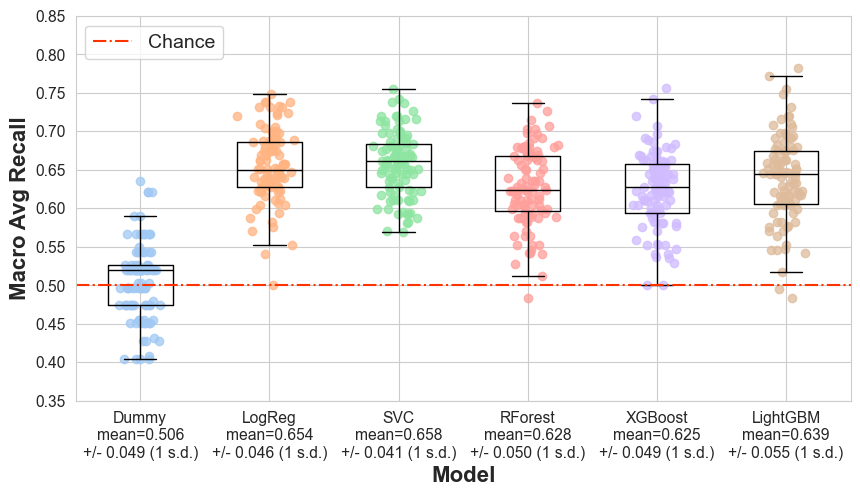

In [23]:
models_dict = {
        'Dummy' :  dummy,
        'LogReg':  logreg_005,
        'SVC':    svc_005,
        'RForest': rf_005,
        'XGBoost': xgb_005,
        'LightGBM': lgbm_005
}

model_preds_dict = {}
model_score_stats = []

recall_macro_scorer = make_scorer(recall_score, average='macro')

for name, model in models_dict.items():

    X_ = X[features_005] if name != 'Dummy' else X
    y_ = y

    cv_metric_scores = cross_val_score(
                                    estimator    = model,
                                    X            = X_,
                                    y            = y_,
                                    n_jobs       = -1,
                                    cv           = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state = 42),
                                    scoring      = recall_macro_scorer
    )
    model_preds_dict[name] = cv_metric_scores
    model_score_stats.append((name, cv_metric_scores.mean(), cv_metric_scores.std()))

model_preds_df = pd.DataFrame(model_preds_dict)
vals, names, xs = [],[],[]
for i, col in enumerate(model_preds_df.columns):
    vals.append(model_preds_df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.075, model_preds_df[col].values.shape[0])) # adds jitter to the data points - can be adjusted (i + 1, 0.04)

plt.figure(figsize=(10, 5))
plt.boxplot(vals, labels=names, medianprops={'color':'black'}, showfliers=False)
palette2 = sns.color_palette('pastel', n_colors=len(names))
for x, val, c in zip(xs, vals, palette2):
    plt.scatter(x, val, alpha=0.75, color=c)

#plt.title('Model Performance Across Varying Data Splits\n(MWU α < 0.05)', weight='bold')
plt.ylabel('Macro Avg Recall', weight='bold', fontsize=16)
plt.xlabel('Model', weight='bold', fontsize=16)
plt.axhline(y=0.5, color='#ff3300', linestyle='-.', label='Chance')
# Manually set y-axis ticks from 0.35 to 1, in steps of 0.05
plt.yticks(np.arange(0.35, 0.9, 0.05), fontsize=11.25)
# include mean and std in xticklabels:
xticklabels = [f'{name}\nmean={mean:0.3f}\n+/- {std:0.3f} (1 s.d.)' for name, mean, std in model_score_stats]
plt.xticks(ticks=np.arange(1, len(names)+1), labels=xticklabels, fontsize=11.25)
plt.legend(loc='upper left', fontsize=14)
plt.show();

## 5) **Global Shapley Values**
---
- >`Select model with highest mean in performance metric and least variability!`

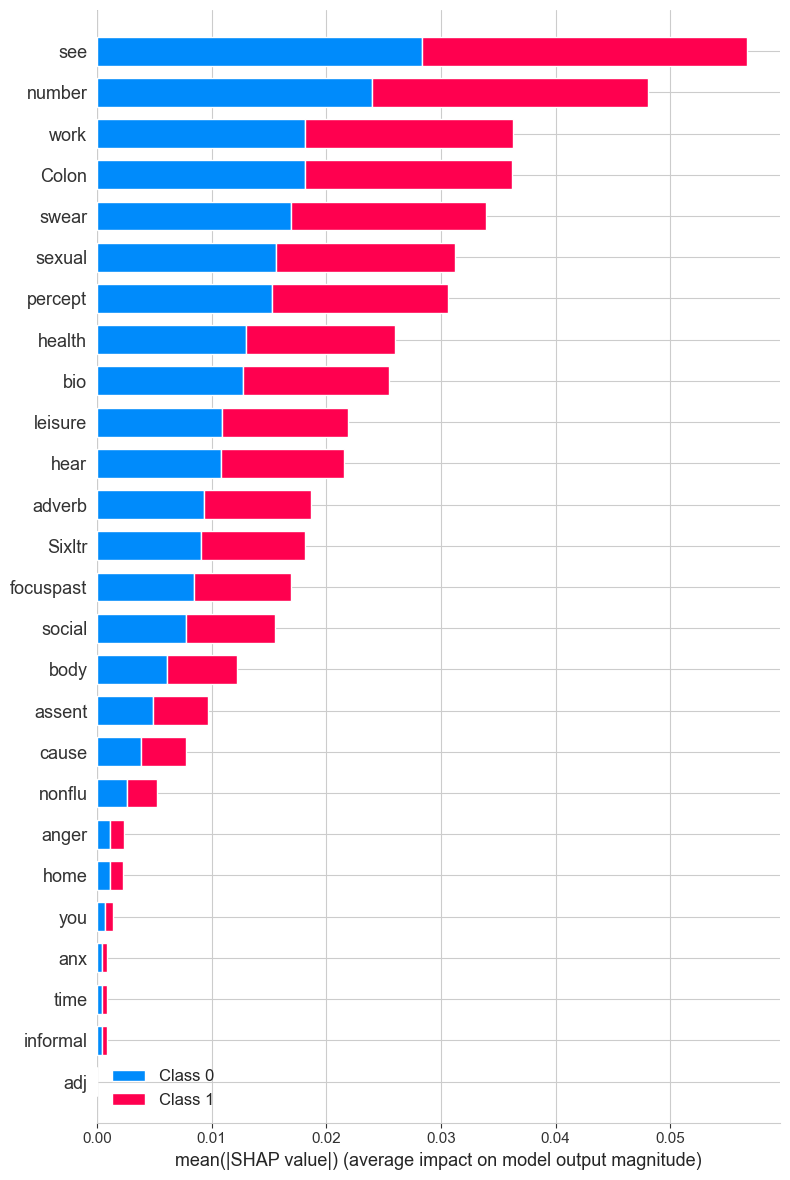

In [55]:
import shap

model = rf_005.named_steps['estimator']

shap_values = shap.TreeExplainer(model).shap_values(X_train[features_005])

shap.summary_plot(shap_values, X_train[features_005], plot_type="bar", show=True, max_display=14)


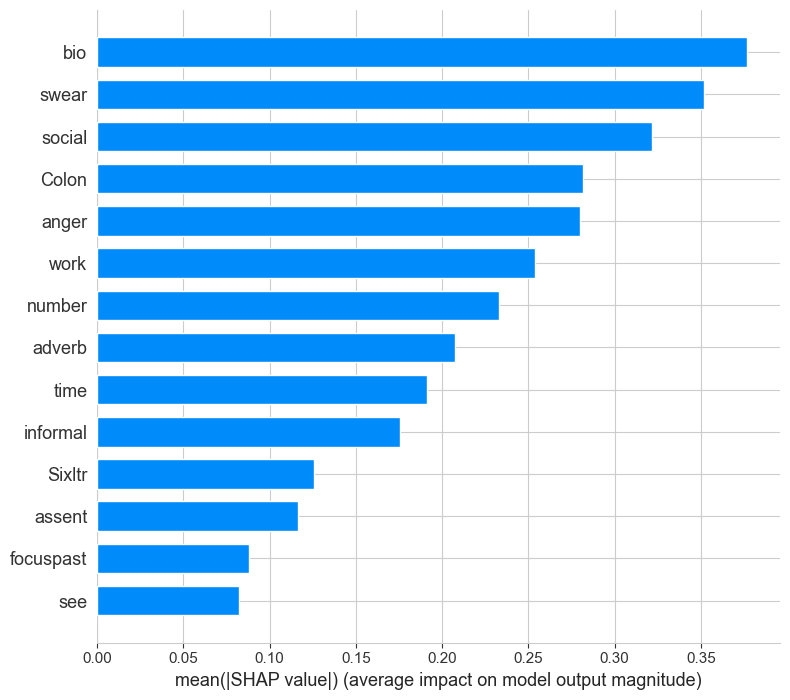

In [17]:
model = logreg_005.named_steps['estimator']

shap_values = shap.LinearExplainer(model, X_train[features_005]).shap_values(X_train[features_005])

shap.summary_plot(shap_values, X_train[features_005], plot_type="bar", show=True, max_display=14)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


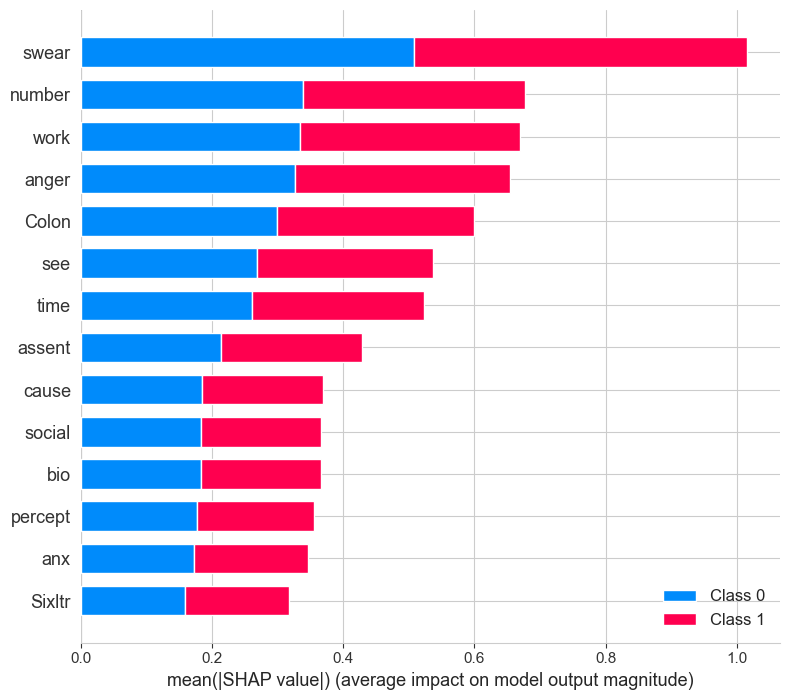

In [18]:
model = lgbm_005.named_steps['estimator']

shap_values = shap.TreeExplainer(model).shap_values(X_train[features_005])

shap.summary_plot(shap_values, X_train[features_005], plot_type="bar", show=True, max_display=14)

In [56]:
# import sklearn pipeline form imblearn
from imblearn.pipeline import Pipeline as ImbPipeline

params = {'C': 0.1, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid', 'shrinking': True, }

svc_pipe = ImbPipeline([
        ('scaler', StandardScaler()),
        ('svc',    SVC(random_state=42, probability=True, **params))
])

svc_pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, decision_function_shape='ovo', degree=2,
                     gamma='auto', kernel='sigmoid', probability=True,
                     random_state=42))])

[learning_curve] Training set sizes: [ 82 164 246 328 410 492 574 656 738 820]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.4s finished


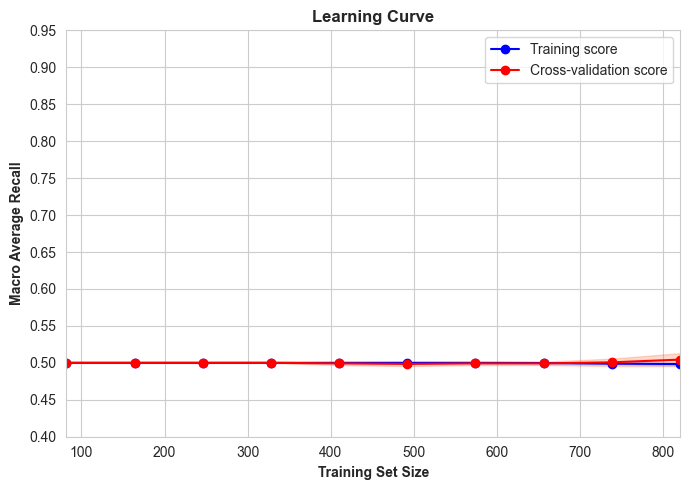

In [57]:
# import learning curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, recall_score, balanced_accuracy_score

# Create CV training and test scores for various training set sizes for XGBoost

train_sizes, train_scores, test_scores = learning_curve(
        estimator   = svc_pipe,
        X           = X_train[features_005],
        y           = y_train,
        train_sizes = np.linspace(0.1, 1.0, 10),
        cv          = StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        scoring     = make_scorer(recall_score, average='macro'),
        n_jobs      = -1,
        verbose     = 1
)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores, axis=1)

# Draw lines
plt.subplots(figsize=(7, 5))
plt.plot(train_sizes, train_mean, marker='o', linestyle='-', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, marker='o', linestyle='-', color="red", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="dodgerblue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="orangered", alpha=0.2)

# Create plot
plt.title("Learning Curve", weight='bold')
plt.xlabel("Training Set Size", weight='bold')
plt.xlim([train_sizes[0], train_sizes[-1]])

plt.ylabel("Macro Average Recall", weight='bold')
plt.yticks(np.arange(0.4, 1.0, 0.05))
plt.legend(loc="best")
plt.tight_layout()
plt.show();


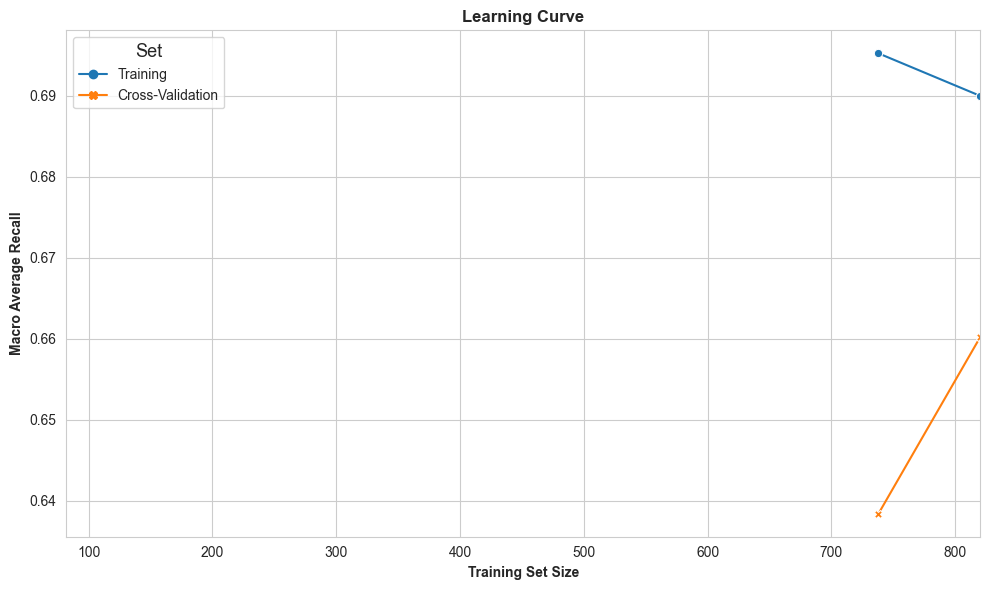

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for Seaborn
# Concatenate training and test scores, then melt the DataFrame to long format
df_train = pd.DataFrame({'Train Size': train_sizes, 'Score': train_mean, 'Set': 'Training'})
df_test = pd.DataFrame({'Train Size': train_sizes, 'Score': test_mean, 'Set': 'Cross-Validation'})
df = pd.concat([df_train, df_test])
df_melted = df.melt(id_vars=['Train Size', 'Set'], value_vars=['Score'])

# Use Seaborn to plot the learning curve
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Train Size', y='value', hue='Set', style='Set', markers=True, dashes=False)

# Set plot details
plt.title('Learning Curve', weight='bold')
plt.xlabel('Training Set Size', weight='bold')
plt.ylabel('Macro Average Recall', weight='bold')
plt.legend(title='Set', title_fontsize='13', loc='best')
plt.xlim([train_sizes[0], train_sizes[-1]])

plt.grid(True)
plt.tight_layout()
plt.show()


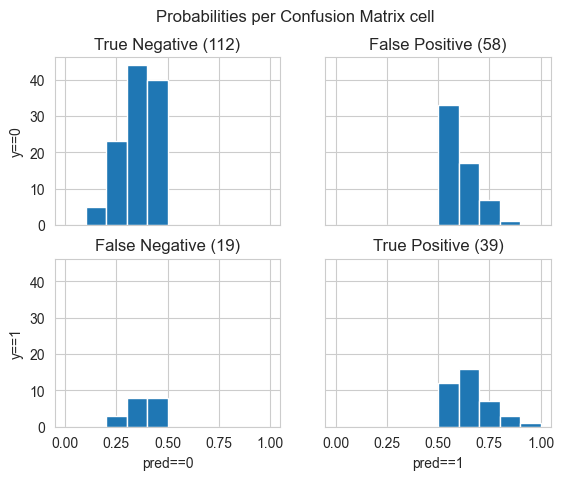

In [51]:
y_pred_proba = svc_005.predict_proba(X_test[features_005])

df_predictions = pd.DataFrame({'y': y_test, 'y_proba': y_pred_proba[:,1]})
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
# show true-pos

bins = np.arange(0, 1.01, 0.1)

def show_quarter(df, query, col, title, ax, bins, x_label=None, y_label=None):
    results = df.query(query)
    results[col].hist(ax=ax, bins=bins);
    if y_label:
        ax.set_ylabel(y_label)
    if x_label:
        ax.set_xlabel(x_label)
    ax.set_title(title + " ({})".format(results.shape[0])) #IANBOB

show_quarter(df_predictions, "y==0 and y_proba < 0.5", "y_proba", "True Negative", axs[0][0], bins, y_label="y==0")
show_quarter(df_predictions, "y==0 and y_proba >= 0.5", "y_proba", "False Positive", axs[0][1], bins)
show_quarter(df_predictions, "y==1 and y_proba >= 0.5", "y_proba", "True Positive", axs[1][1], bins, x_label="pred==1")
show_quarter(df_predictions, "y==1 and y_proba < 0.5", "y_proba", "False Negative", axs[1][0], bins, x_label="pred==0", y_label="y==1")
fig.suptitle("Probabilities per Confusion Matrix cell");

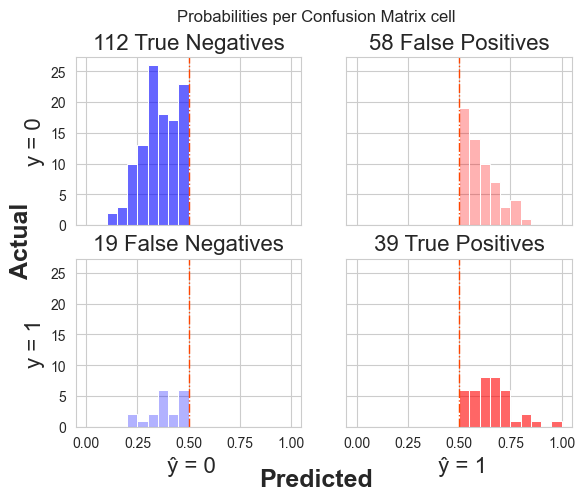

In [13]:
y_pred_proba = svc_005.predict_proba(X_test[features_005])

df_predictions = pd.DataFrame({'y': y_test, 'y_proba': y_pred_proba[:,1]})
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
# show true-pos

bins = np.arange(0, 1.01, 0.05)

def show_quarter(df, query, col, title, ax, bins, color, alpha, x_label=None, y_label=None):
    results = df.query(query)
    #results[col].hist(ax=ax, bins=bins);
    sns.histplot(results[col], kde=False, ax=ax, bins=bins, color=color, alpha=alpha)
    if y_label:
        ax.set_ylabel(y_label, fontsize=16)
    if x_label:
        ax.set_xlabel(x_label, fontsize=16)
    #ax.set_title(title + " ({})".format(results.shape[0]), fontsize=16)
    ax.set_title(f'{results.shape[0]} {title}', fontsize=16)
    # vertical line at 0.5
    ax.axvline(x=0.5, color='orangered', linestyle='-.', linewidth=1)

show_quarter(df_predictions, " y==0 and y_proba < 0.5", "y_proba", "True Negatives", axs[0][0], bins, color='blue', alpha=0.6, y_label="y = 0")
show_quarter(df_predictions, " y==0 and y_proba >= 0.5", "y_proba", "False Positives", axs[0][1], bins, color='red', alpha=0.3)
show_quarter(df_predictions, " y==1 and y_proba >= 0.5", "y_proba", "True Positives", axs[1][1], bins, color='red', alpha=0.6, x_label=" ŷ = 1")
show_quarter(df_predictions, " y==1 and y_proba < 0.5", "y_proba", "False Negatives", axs[1][0], bins, x_label=" ŷ = 0", color='blue', alpha=0.3, y_label="y = 1")

# Set common labels
fig.text(0.5, 0.000001, 'Predicted', ha='center', va='center', fontsize=18, weight='bold')
fig.text(0.04, 0.5, 'Actual', ha='center', va='center', rotation='vertical', fontsize=18, weight='bold')


fig.suptitle("Probabilities per Confusion Matrix cell");